Notebook for drought calculation

In [34]:
import sys, os
import geopandas as gpd
import rasterio as rio
import numpy as np
from rasterstats import zonal_stats
from rasterio.plot import show
import pandas as pd
from glob import glob

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.plot import plotting_extent

In [2]:
out_dir = os.path.join(os.path.expanduser("~"), 'data', 'south_sudan')
out_spei = os.path.join(out_dir, 'spei')

In [3]:
adm2 = gpd.read_file(os.path.join(out_dir, "SS_ADM2.shp"))

In [4]:
spei_files = os.listdir(out_spei)

In [5]:
spei_files = [os.path.join(out_spei, f) for f in spei_files]

In [6]:
spei_files[0:5]

['/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1958-12-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1959-01-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1959-02-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1959-03-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1959-04-01.tif']

### TUTORIAL: Loading raster and zonal stats

In [10]:
file = spei_files[0]

In [11]:
spei_rio = rio.open(file)

In [12]:
# still just a rasterio object, haven't read any data
type(spei_rio)

rasterio.io.DatasetReader

In [13]:
spei_rio.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 269,
 'height': 211,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.041666666666666664, 0.0, 24.125,
        0.0, -0.041666666666666664, 12.25)}

See that no data is encoded as numpy nan (not a number) which is equivalent to infinity

In [14]:
#read frist band from rasterio object, result is a numpy array
data = spei_rio.read(1)

In [15]:
type(data)

numpy.ndarray

In [16]:
data.shape
#rows and columns

(211, 269)

In [17]:
data.max()

nan

In [18]:
np.nanmax(data)

2.1608233

In [19]:
np.nanmin(data)

-0.011809923

In [20]:
data.shape

(211, 269)

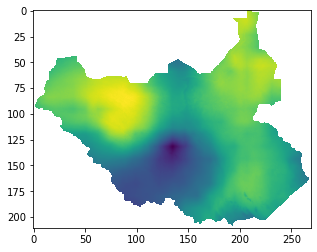

<AxesSubplot:>

In [21]:
show(data)

Documentation for zonal stats:  
https://pythonhosted.org/rasterstats/manual.html

In [22]:
adm2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
spei_rio.crs

CRS.from_epsg(4326)

In [24]:
zs = zonal_stats(adm2, data, affine=spei_rio.transform, stats='mean', nodata=spei_rio.nodata)

In [25]:
pd.DataFrame(zs)

,mean
0,1.222566
1,1.218728
2,1.119216
3,1.179333
4,0.963048
...,...
73,0.460215
74,1.091493
75,0.558151
76,0.844315


reclass

In [26]:
data[data >= -1.5] = 0 # no drought
data[data < -1.5] = 1 # drought

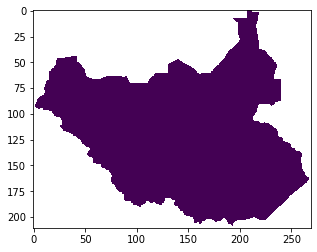

<AxesSubplot:>

In [27]:
show(data)

In [28]:
data[np.isnan(data)]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

## Drought analysis

We define drought frequency as the number of months in which the SPEI < −1.5, which corresponds to the lower limit of a severe drought based on the U.S. Drought Monitor classification scheme  

Please calculate the drought frequency for each decade (i.e., for each pixel i and decade d count the number of times n where the pixel value is  SPEI < −1.5, so that drought frequency is n/120, where 120 is the number of months in the decade)  

Compare drought frequency in 2000s and 2010s to the ‘baseline’ defined as drought frequency in 1950-1960. This can be done by calculate the % change in drought frequency for each pixel.


In [36]:
glob(out_spei+'/wld_cli_spei_gamma_12_terraclimate_196*')

['/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-01-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-02-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-03-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-04-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-05-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-06-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-07-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-08-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-09-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-10-01.tif',
 '/home/wb514197/data/south_sudan/spei/wld_cli_spei_gamma_12_terraclimate_1960-11-01.tif',

Try one decade

In [51]:
decade_files = glob(out_spei+'/wld_cli_spei_gamma_12_terraclimate_197*')

In [52]:
# for file in decade_files:
#     date = file[-14:-4]

In [53]:
len(decade_files)

120

store all boolean results in a list, then convert to three dim numpy array

In [64]:
res = []
for file in decade_files:
    spei_rio = rio.open(file)
    data = spei_rio.read(1)
    data[data >= -1.5] = 0 # no drought
    data[data < -1.5] = 1 # drought
#     print(np.nanmax(data))
#     data[np.isnan(data)] = -99 # change nodata value to save as integer
#     data = data.astype('int')
    res.append(data)

In [65]:
res_np = np.array(res)

In [66]:
# sum all values over the first axis
sum_dec = res_np.sum(axis=0)

In [67]:
np.nanmax(sum_dec)

3.0

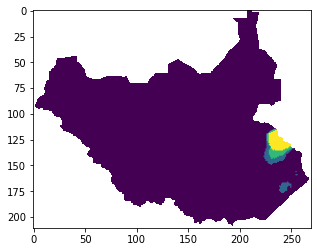

<AxesSubplot:>

In [68]:
show(sum_dec)

All decades

In [69]:
decades = ['196', '197', '198', '199', '200', '201']

In [71]:
decade_results = []

In [72]:
for decade in decades:
    decade_files = glob(out_spei + f'/wld_cli_spei_gamma_12_terraclimate_{decade}*')
    
    res = []
    for file in decade_files:
        spei_rio = rio.open(file)
        data = spei_rio.read(1)
        data[data >= -1.5] = 0 # no drought
        data[data < -1.5] = 1 # drought
        res.append(data)
    
    res_np = np.array(res)
    sum_decade = res_np.sum(axis=0)
    decade_results.append(sum_decade)

In [74]:
len(decade_results)

6

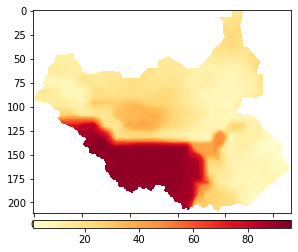

In [100]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
# show(decade_results[5], cmap="YlOrRd")
im = ax.imshow(decade_results[5], cmap='YlOrRd')
cb = fig.colorbar(im, cax=cax, orientation='horizontal')

In [103]:
[np.nanmax(d) for d in decade_results]

[1.0, 3.0, 35.0, 19.0, 17.0, 96.0]

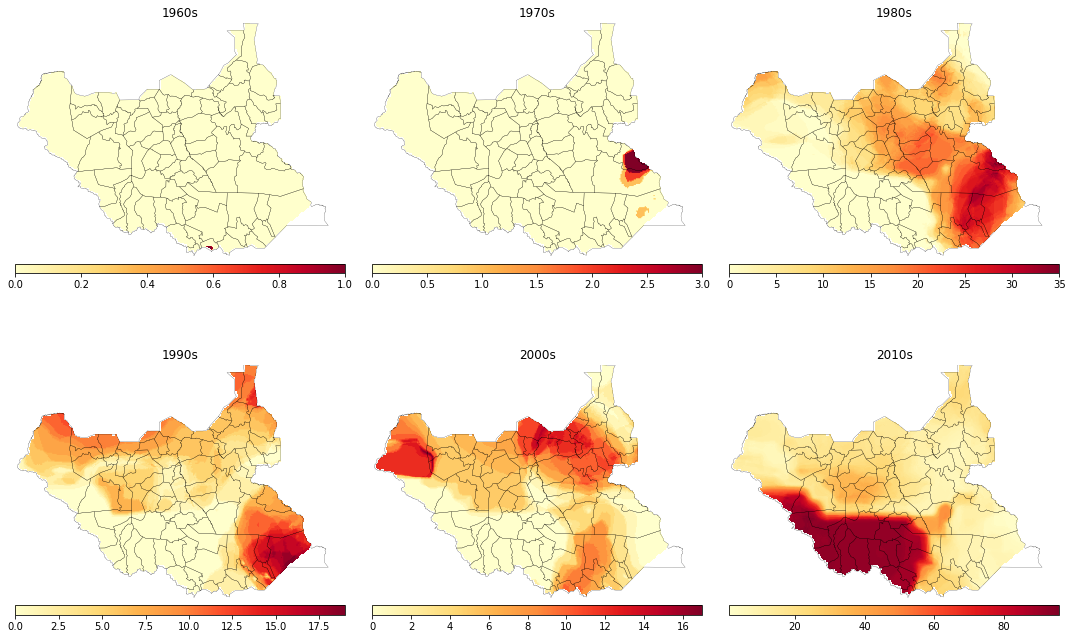

In [132]:
fig = plt.figure(figsize=(15, 10))
for i, data in enumerate(decade_results):
    decade = decades[i]+"0s"
    i = i+1
    ext = plotting_extent(spei_rio)
    ax = fig.add_subplot(2,3,i)
    ax.set_title(f"{decade}")
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size="4%", pad=0.1)
    im = ax.imshow(data, cmap='YlOrRd', extent=ext)
    adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal')
    
plt.tight_layout()

0 1960s
1 1970s
2 1980s
3 1990s
4 2000s
5 2010s


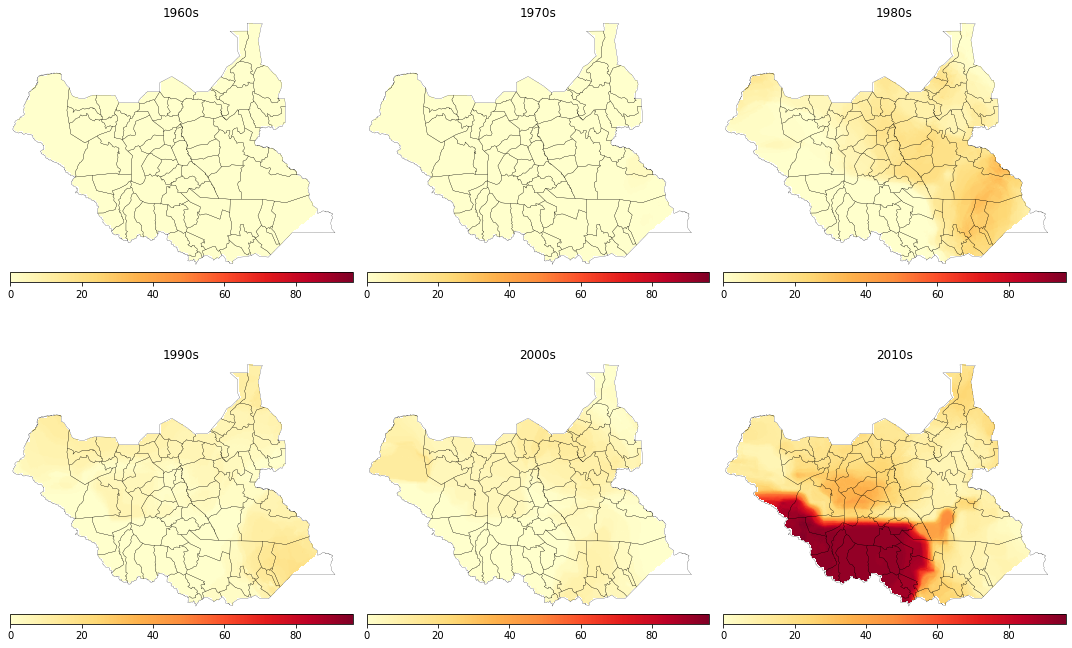

In [136]:
fig = plt.figure(figsize=(15, 10))
for i, data in enumerate(decade_results):
    decade = decades[i]+"0s"
    print(i, decade)
    i = i+1
    ext = plotting_extent(spei_rio)
    ax = fig.add_subplot(2,3,i)
    ax.set_title(f"{decade}")
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size="4%", pad=0.1)
    im = ax.imshow(data, cmap='YlOrRd', extent=ext, vmin=0, vmax=96)
    adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal')
    
plt.tight_layout()

In [138]:
decade_results[1]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [144]:
zs_res = []

In [145]:
for decade, data in zip(decades, decade_results):
    zs = zonal_stats(adm2, data, affine=spei_rio.transform, stats='max', nodata=spei_rio.nodata)
    zs_df = pd.DataFrame(zs).rename(columns={'max':f'max_{decade}'})
    zs_res.append(zs_df)

In [149]:
zs_res = pd.concat(zs_res, axis=1)
zs_res = adm2.join(zs_res)

In [151]:
zs_res.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,RP100_he_1,RP100_buil,Area2,geometry,max_196,max_197,max_198,max_199,max_200,max_201
0,6.425236,18611.507286,Juba,SS0101,None,None,None,Central Equatoria,SS01,South Sudan,...,0.062500,13960.0,18365.20,"POLYGON ((32.10224 5.36788, 32.09834 5.21346, ...",0.0,0.0,16.0,4.0,9.0,92.0
1,2.082643,2549.814924,Kajo-keji,SS0102,None,None,None,Central Equatoria,SS01,South Sudan,...,0.000000,9.0,2515.96,"POLYGON ((31.61854 4.02379, 31.69394 3.95754, ...",1.0,0.0,4.0,2.0,10.0,46.0
2,3.402761,3545.715110,Lainya,SS0103,None,None,None,Central Equatoria,SS01,South Sudan,...,0.000000,5.0,3501.75,"POLYGON ((31.18674 4.30480, 31.17532 4.25454, ...",0.0,0.0,0.0,0.0,7.0,92.0
3,2.069064,1326.493498,Morobo,SS0104,None,None,None,Central Equatoria,SS01,South Sudan,...,0.000000,34.0,1309.79,"POLYGON ((31.04738 3.81817, 31.09567 3.74048, ...",0.0,0.0,0.0,0.0,6.0,89.0
4,5.221777,10813.630464,Terekeka,SS0105,None,Terkeka,None,Central Equatoria,SS01,South Sudan,...,0.086957,2998.0,10673.80,"POLYGON ((31.02171 5.90953, 31.69732 5.87275, ...",0.0,0.0,16.0,3.0,8.0,92.0
